In [ ]:
#default_exp network_embedding

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
# export
import networkx as nx
from networkx.algorithms.community.label_propagation import asyn_lpa_communities
from networkx.algorithms.community import greedy_modularity_communities, girvan_newman, asyn_lpa_communities
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
from collections import defaultdict, Counter
import pylab as plt

In [ ]:
# export
class SemanticNetwork:
    def __init__(self,nneigh, min_sim, model):
        self.nneigh = nneigh
        self.min_sim = min_sim
        self.model = model
        self.net = nx.DiGraph()
    
    def _get_corpus_gen(self, corpus_file):
        corpus = (d for d in open(corpus_file,'r').readlines())
        return corpus
    
    def get_vectors(self):
        """
        Returns document vecctores for all documents used in the training
        """
        return self.model.dv.vectors

    def infer_vectors(self, corpus_file):
        """
        Return inferred vectors from corpus file
        """
        corpus = self._get_corpus_gen(corpus_file)
        vectors = np.zeros((self.model.corpus_count,self.model.dv.vector_size)) #vectors as lines
        for i,doc in enumerate(corpus):
            vectors[i,:] = self.model.infer_vector(doc.split())

        return vectors

    def get_agglomerative_cluster(self, vectors):
        clust = fc.linkage_vector(vectors, method="single", metric='cosine')
        return clust

    def grow_network(self, vectors, minsim=0.7):
        dists = pdist(vectors, metric='euclidean')
        sims = squareform(1/(1+dists))
        del dists
        sims[sims<minsim] = 0
        print(sims.shape)
        self.net = nx.convert_matrix.from_numpy_matrix(sims, create_using=nx.MultiDiGraph)

    def get_communities(self, algorithm='LPA'):
        if algorithm == 'LPA':
            comms = asyn_lpa_communities(self.net)
        elif algorithm == 'mod':
            comms = greedy_modularity_communities(self.net)
        return comms
        


            



In [ ]:
from gensim.models.doc2vec import Doc2Vec

In [ ]:
model = Doc2Vec.load('zika.d2v')

In [ ]:
SN = SemanticNetwork(10,0.7,model)

In [ ]:
vecs = SN.get_vectors()

In [ ]:
clust = SN.get_agglomerative_cluster(vecs)

In [ ]:
SN.grow_network(vecs)

(33558528,)
(8193, 8193)


In [ ]:
SN.net[16][100]

AtlasView({0: {'weight': 0.7948908195795175}})

Found 8039 communities
53


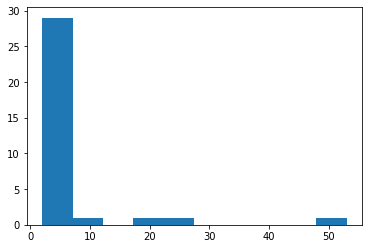

In [ ]:
communities = greedy_modularity_communities(SN.net, weight='weight', n_communities=100, resolution=3)
# communities = [c for c in girvan_newman(SN.net)]
# communities = [c for c in asyn_lpa_communities(SN.net, weight='weight')]
print(f'Found {len(communities)} communities')
print(len(communities[0]))
plt.hist([len(c) for c in communities if len(c)>1], bins=10);

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
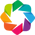

In [ ]:
#export
import holoviews as hv
from holoviews.operation.datashader import datashade, bundle_graph
import networkx as nx
hv.extension('bokeh')
defaults = dict(width=800, height=800)
hv.opts.defaults(
    hv.opts.EdgePaths(**defaults), hv.opts.Graph(**defaults), hv.opts.Nodes(**defaults))



In [ ]:
#export
def plot_network(G):
    colors = ['#000000']+hv.Cycle('Category20').values
    graph = hv.Graph.from_networkx(G, nx.layout.fruchterman_reingold_layout, 
                                   weight='weight').opts(tools=['hover'],
                                                         cmap=colors,
                                                         node_size=30,
                                                         bgcolor='gray',
                                                         node_line_color='gray'
                                                        )
    labels = hv.Labels(graph.nodes, ['x', 'y'], 'index')
    bg = bundle_graph(graph)
    return bg*labels.opts(text_font_size='8pt', text_color='white')

In [ ]:
plot_network(SN.net.subgraph(communities[0]))

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

## Hierarchical clustering

In [ ]:
import seaborn as sns 

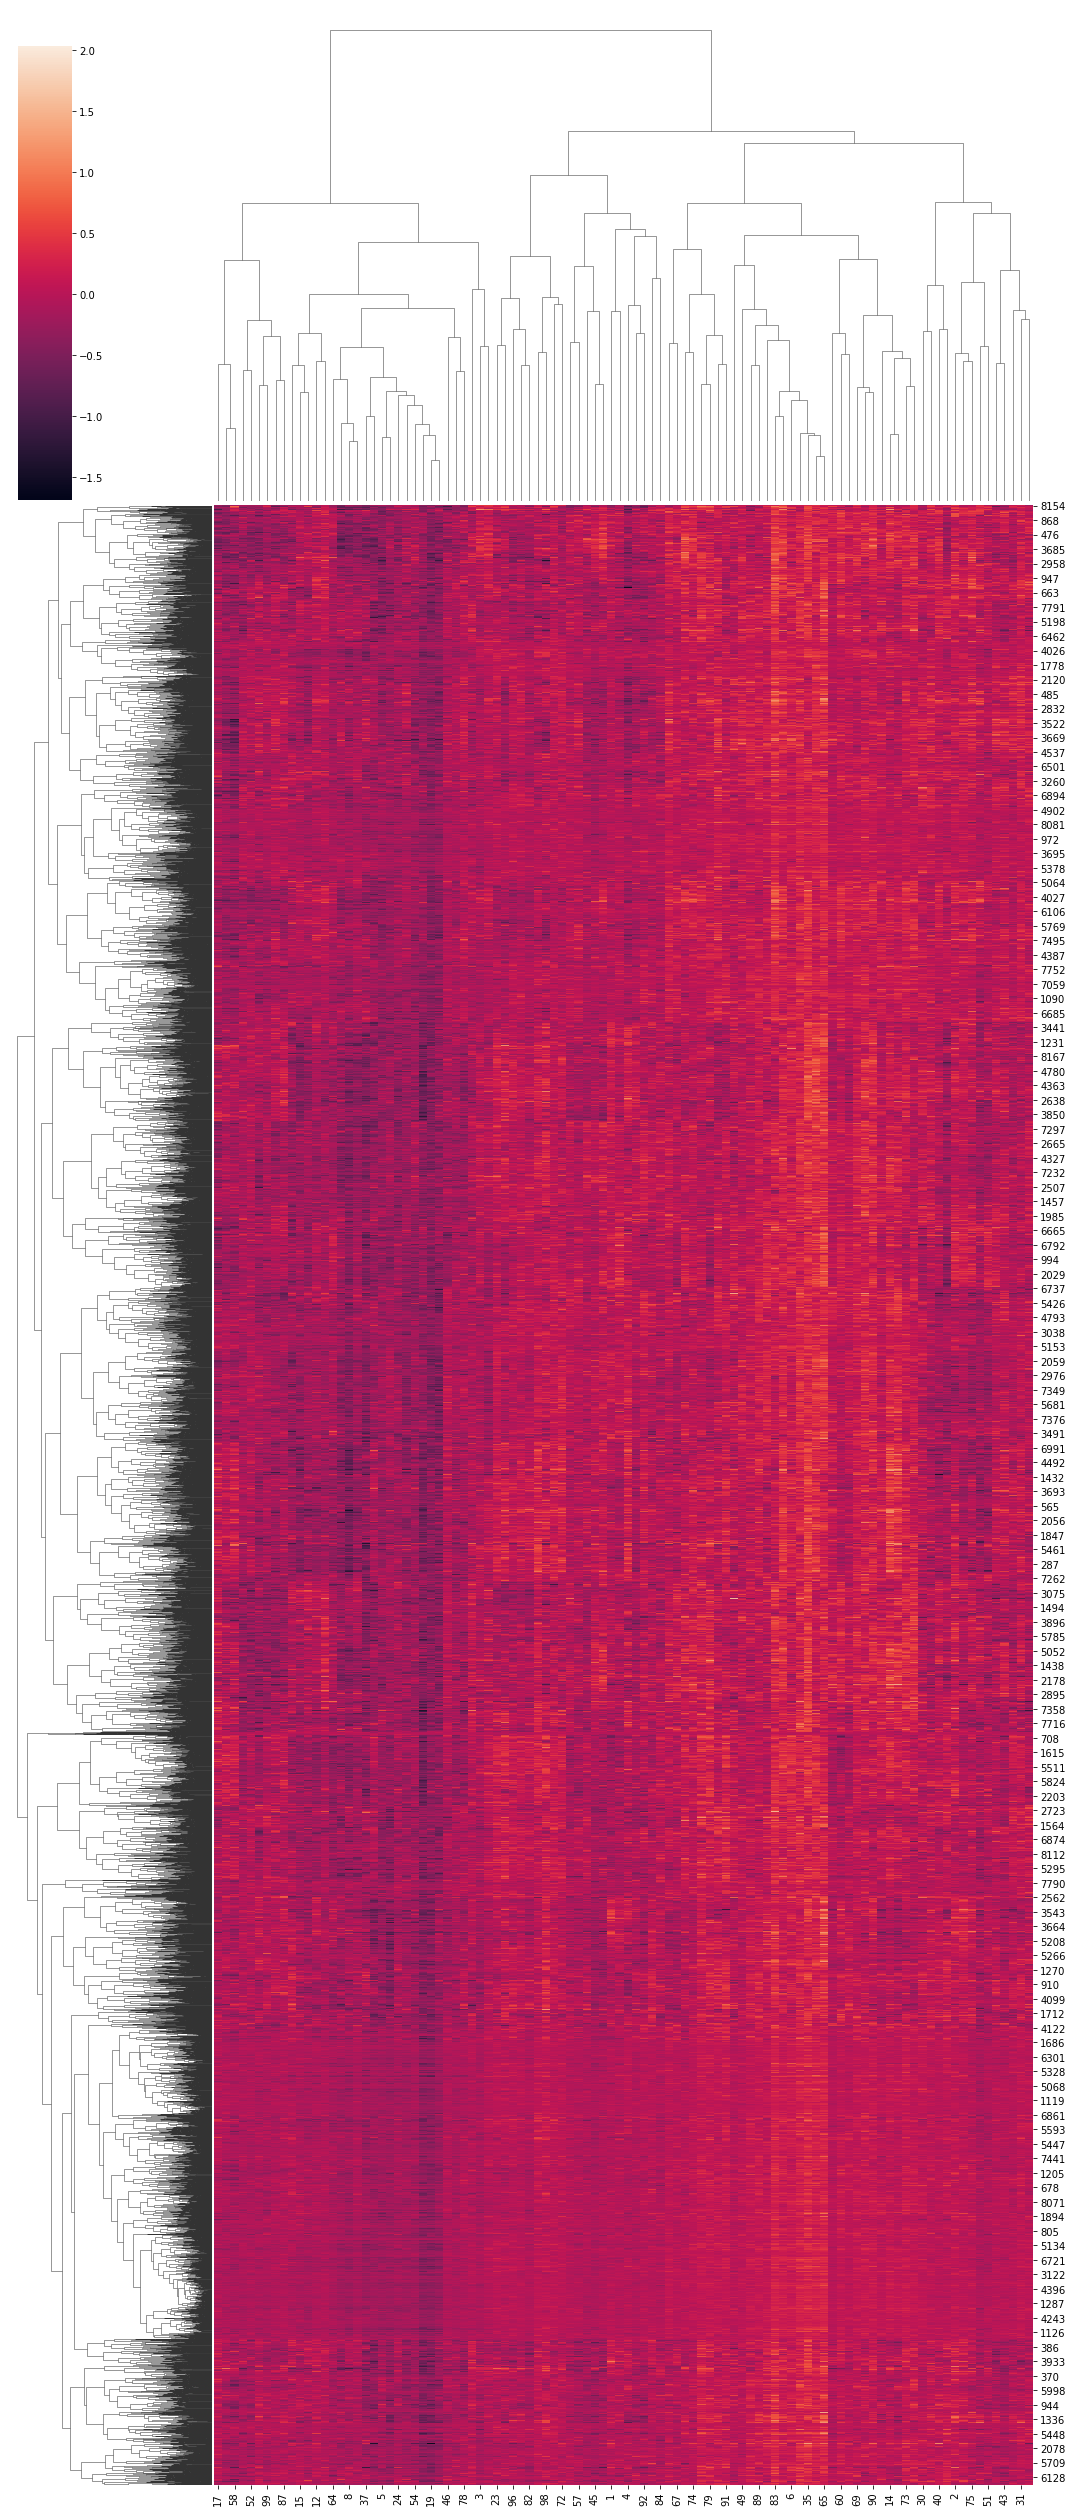

In [ ]:
g = sns.clustermap(vecs, method='complete', metric='cosine', figsize =(15,35));

### Extracting clusters from the dendrogram

In [ ]:
#export

def get_clusters(linkage, dists, threshold=0.9):  
    """
    Returns cluster id for every document in the corpus
    """ 
    clusters = fcluster(doc_linkage, threshold*dists.max(), 'distance')
    return clusters
    


In [ ]:
doc_linkage = g.dendrogram_row.linkage
dists = pdist(vecs,metric='cosine')
cs = get_clusters(doc_linkage,dists, 0.6)
Counter(cs)

Counter({16: 53,
         35: 385,
         33: 212,
         6: 131,
         73: 1279,
         37: 148,
         79: 124,
         4: 161,
         69: 64,
         57: 85,
         26: 154,
         8: 275,
         14: 186,
         39: 89,
         15: 40,
         64: 158,
         66: 85,
         31: 167,
         32: 266,
         25: 265,
         54: 140,
         44: 42,
         27: 244,
         2: 248,
         41: 106,
         58: 107,
         18: 178,
         23: 80,
         59: 113,
         21: 236,
         77: 141,
         43: 110,
         62: 30,
         9: 75,
         34: 164,
         75: 59,
         42: 91,
         78: 131,
         7: 45,
         61: 33,
         45: 39,
         13: 69,
         76: 51,
         46: 70,
         3: 111,
         30: 56,
         24: 49,
         53: 139,
         19: 148,
         38: 35,
         67: 54,
         20: 21,
         36: 44,
         11: 24,
         29: 50,
         1: 34,
         28: 15,
         

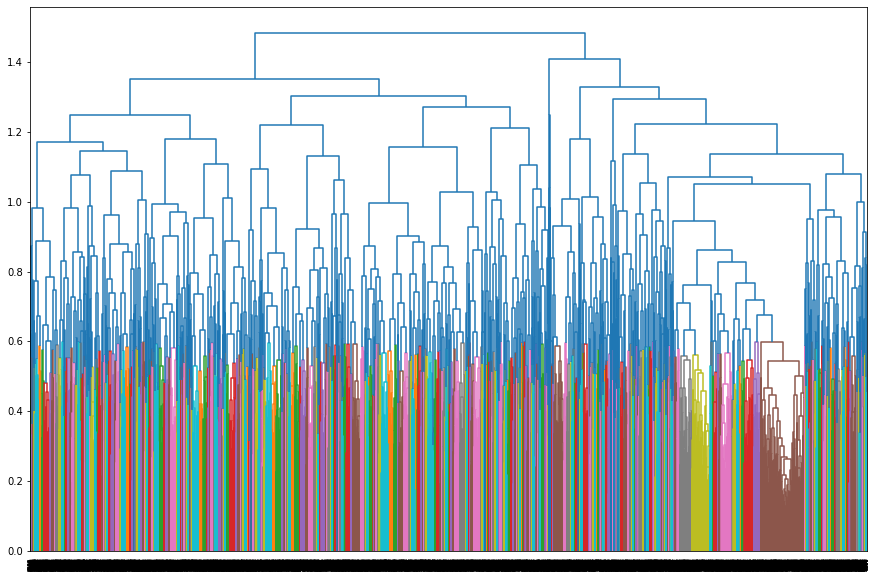

In [ ]:
fig, ax = plt.subplots(1,1, figsize =(15,10))
den = dendrogram(doc_linkage,color_threshold=0.6, ax=ax)